In [35]:
import pandas as pd
import os
from pathlib import Path
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
import protein_design_utils

import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from isambard import ampal

In [9]:
def PMPNN_directory_to_df(pdb_paths=str,temp_dir=str, temp_label=float):
    # Define your base directories
    base_dir = Path(pdb_paths)
    PMPNN_dir = base_dir / "seqs" / temp_dir

    # Initialize a list to collect data
    data = []

    # Iterate over each .pdb file in the RFDiff_files directory
    for pdb_file in base_dir.glob("*.pdb"):

        pdb_file_name = pdb_file.stem  # Get the .pdb file name without the extension

        # Construct the path to the corresponding .fa file
        fa_file_path = PMPNN_dir / pdb_file_name / "seqs" / f"{pdb_file_name}.fa"

        # Check if the .fa file exists
        if fa_file_path.exists():
            # Open and read the .fa file
            with open(fa_file_path, "r") as fa_file:
                lines = fa_file.readlines()

            for line in lines:
                if line.startswith(">"):  # Header line with scores and metadata
                    # Extract scores and metadata
                    header_parts = line.strip().split(", ")
                    metadata = {part.split("=")[0]: part.split("=")[1] for part in header_parts if "=" in part}

                    # Prepare a new row for the DataFrame
                    row = {
                        "pdb_file": pdb_file_name,
                        "sequence": "",  # Placeholder, will be filled with the next line
                        "score": metadata.get("score"),
                        "global_score": metadata.get("global_score"),
                        "seq_recovery": metadata.get("seq_recovery"),
                        "fasta_file_path": fa_file_path
                        # Add more metadata as needed
                    }

                else:  # Sequence line
                    row["sequence"] = line.strip()
                    data.append(row)
        else:
            print(f'file was not found at {fa_file_path}')

    # Convert the collected data into a pandas DataFrame
    pmpnn_df = pd.DataFrame(data)

    pmpnn_df['sequence_length'] = pmpnn_df['sequence'].str.len()
    pmpnn_df['RDiff_pdb_file_path'] = pmpnn_df['pdb_file'].apply(lambda x: f"{base_dir}/{x}.pdb")
    pmpnn_df = pmpnn_df.dropna(subset=['seq_recovery']).reset_index(drop=True)
    
    pmpnn_df['pmpnn temp']=temp_label
    return pmpnn_df

In [ ]:
'./02SEP24/seqs/tempp1/'

In [11]:
temp_1_df = PMPNN_directory_to_df('./02SEP24/','temp1',1.0)
temp_p1_df = PMPNN_directory_to_df('./02SEP24/','tempp1',0.1)
temp_p01_df = PMPNN_directory_to_df('./02SEP24/','tempp01',0.01)

In [12]:
master_df = pd.concat([temp_1_df, temp_p1_df, temp_p01_df],ignore_index=True)

In [14]:
master_df = master_df.reset_index()

In [15]:
master_df

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp
0,0,normal_28,LTKYENSQEQACNIYKRNALGADNAAEISRGNEIAARENPVKASEE...,2.2076,2.1258,0.0500,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00
1,1,normal_28,EEELKRAEYAANHIWKEAQMGMEYADTYMLGCDIRAQIYPEQQAES...,2.1360,2.1018,0.0375,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00
2,2,normal_28,YPSFYIALNLSQIFDHSANLSLLYANQKAAGDASRARKPPENAVSA...,2.3515,2.1603,0.0250,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00
3,3,normal_28,ELKYSEGLADAASQIRAGGNGTAEAMDEAVGAITYAKQAVGLRVHA...,2.3720,2.1852,0.1125,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00
4,4,normal_633,LDKNDNSQESACNAAKRNALLADNEAEIQRANGVDKRTVNVMLSTE...,2.3719,2.2206,0.0250,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00
...,...,...,...,...,...,...,...,...,...,...
2263,2263,normal_992,SEEEKKKEEEKKAAEAAKAAKEAALAEGKKDPALYAKVKGAIDAAE...,1.2751,1.7939,0.0375,02SEP24/seqs/tempp01/normal_992/seqs/normal_99...,80,02SEP24/normal_992.pdb,0.01
2264,2264,beta_377,AAATVTAANIAIATALANAPTWAPDEAIARVTAAAAKLSPKYAEAA...,1.0538,1.7782,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01
2265,2265,beta_377,AEETVTKAELEAAEALAKAPEWSPEETLAKVTAAYAKLSPKRAEEA...,1.0532,1.7615,0.0625,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01
2266,2266,beta_377,AAATTTAAAVAAAAALAAAPTADAAATRAALAAAYATLSPARAAAA...,0.9235,1.6996,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01


In [16]:
def write_fasta_files(df, folder_path, max_files_per_folder=1000):
    # Create the base folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Initialize counters for folder and file
    folder_counter = 1
    file_counter = 0
    
    # Create the first subfolder
    current_folder = os.path.join(folder_path, f"set{folder_counter}")
    if not os.path.exists(current_folder):
        os.makedirs(current_folder)
    
    # Iterate over rows of the dataframe
    for index, row in df.iterrows():
        # Check if we've reached the max files per folder
        if file_counter >= max_files_per_folder:
            # Move to the next folder
            folder_counter += 1
            current_folder = os.path.join(folder_path, f"set{folder_counter}")
            if not os.path.exists(current_folder):
                os.makedirs(current_folder)
            file_counter = 0  # Reset file counter for the new folder
        
        # Generate the filename for the FASTA file using the index
        file_name = f"{row['index']}.fasta"
        file_path = os.path.join(current_folder, file_name)
        
        # Write the sequence to the FASTA file
        with open(file_path, "w") as fasta_file:
            fasta_file.write(f">{index}\n")
            fasta_file.write(f"{row['sequence']}\n")
        
        # Update the dataframe with the file path
        df.at[index, 'fasta_path'] = file_path
        
        # Increment the file counter
        file_counter += 1
    
    return df

In [17]:
master_df = write_fasta_files(master_df, '../ESM/03SEP24')


In [18]:
master_df

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path
0,0,normal_28,LTKYENSQEQACNIYKRNALGADNAAEISRGNEIAARENPVKASEE...,2.2076,2.1258,0.0500,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/0.fasta
1,1,normal_28,EEELKRAEYAANHIWKEAQMGMEYADTYMLGCDIRAQIYPEQQAES...,2.1360,2.1018,0.0375,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/1.fasta
2,2,normal_28,YPSFYIALNLSQIFDHSANLSLLYANQKAAGDASRARKPPENAVSA...,2.3515,2.1603,0.0250,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/2.fasta
3,3,normal_28,ELKYSEGLADAASQIRAGGNGTAEAMDEAVGAITYAKQAVGLRVHA...,2.3720,2.1852,0.1125,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/3.fasta
4,4,normal_633,LDKNDNSQESACNAAKRNALLADNEAEIQRANGVDKRTVNVMLSTE...,2.3719,2.2206,0.0250,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00,../ESM/03SEP24/set1/4.fasta
...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,normal_992,SEEEKKKEEEKKAAEAAKAAKEAALAEGKKDPALYAKVKGAIDAAE...,1.2751,1.7939,0.0375,02SEP24/seqs/tempp01/normal_992/seqs/normal_99...,80,02SEP24/normal_992.pdb,0.01,../ESM/03SEP24/set3/2263.fasta
2264,2264,beta_377,AAATVTAANIAIATALANAPTWAPDEAIARVTAAAAKLSPKYAEAA...,1.0538,1.7782,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2264.fasta
2265,2265,beta_377,AEETVTKAELEAAEALAKAPEWSPEETLAKVTAAYAKLSPKRAEEA...,1.0532,1.7615,0.0625,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2265.fasta
2266,2266,beta_377,AAATTTAAAVAAAAALAAAPTADAAATRAALAAAYATLSPARAAAA...,0.9235,1.6996,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2266.fasta


## Go run ESMFold for monomer refolding

In [21]:
# Base path to the ESM results
path_to_ESM = '../ESM/03SEP24'

# Function to map pdb_file to result file path
def map_result_path(row,max_files_per_folder=1000):
    
    def find_pdb_file(pdb_dir):
        try:
            pdb_files = [f for f in os.listdir(pdb_dir) if f.endswith('.pdb')]
            if pdb_files:
                return os.path.join(pdb_dir, pdb_files[0])
            else:
                return None
        except FileNotFoundError:
            return None
    
    # Determine the set number based on the index or folder structure
    folder_index = row.name // max_files_per_folder + 1  # Calculate which set folder it belongs to
    set_folder = f"set{folder_index}"
    
    # Extract pdb_file name (e.g., '100')
    pdb_number = row['index']
    
    # Build the result file path
    result_file = f"{pdb_number}_result"
    result_path = os.path.join(path_to_ESM, set_folder, 'outputs', result_file)
    
    # Find the actual .pdb file in the result directory
    result = find_pdb_file(result_path)
    
    return result

# Apply the function to the dataframe
master_df['ESM_pdb_path'] = master_df.apply(map_result_path, axis=1)

In [22]:
master_df

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path,ESM_pdb_path
0,0,normal_28,LTKYENSQEQACNIYKRNALGADNAAEISRGNEIAARENPVKASEE...,2.2076,2.1258,0.0500,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/0.fasta,None
1,1,normal_28,EEELKRAEYAANHIWKEAQMGMEYADTYMLGCDIRAQIYPEQQAES...,2.1360,2.1018,0.0375,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/1.fasta,../ESM/03SEP24/set1/outputs/1_result/1.pdb
2,2,normal_28,YPSFYIALNLSQIFDHSANLSLLYANQKAAGDASRARKPPENAVSA...,2.3515,2.1603,0.0250,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/2.fasta,../ESM/03SEP24/set1/outputs/2_result/2.pdb
3,3,normal_28,ELKYSEGLADAASQIRAGGNGTAEAMDEAVGAITYAKQAVGLRVHA...,2.3720,2.1852,0.1125,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/3.fasta,../ESM/03SEP24/set1/outputs/3_result/3.pdb
4,4,normal_633,LDKNDNSQESACNAAKRNALLADNEAEIQRANGVDKRTVNVMLSTE...,2.3719,2.2206,0.0250,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00,../ESM/03SEP24/set1/4.fasta,../ESM/03SEP24/set1/outputs/4_result/4.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,normal_992,SEEEKKKEEEKKAAEAAKAAKEAALAEGKKDPALYAKVKGAIDAAE...,1.2751,1.7939,0.0375,02SEP24/seqs/tempp01/normal_992/seqs/normal_99...,80,02SEP24/normal_992.pdb,0.01,../ESM/03SEP24/set3/2263.fasta,../ESM/03SEP24/set3/outputs/2263_result/2263.pdb
2264,2264,beta_377,AAATVTAANIAIATALANAPTWAPDEAIARVTAAAAKLSPKYAEAA...,1.0538,1.7782,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2264.fasta,../ESM/03SEP24/set3/outputs/2264_result/2264.pdb
2265,2265,beta_377,AEETVTKAELEAAEALAKAPEWSPEETLAKVTAAYAKLSPKRAEEA...,1.0532,1.7615,0.0625,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2265.fasta,../ESM/03SEP24/set3/outputs/2265_result/2265.pdb
2266,2266,beta_377,AAATTTAAAVAAAAALAAAPTADAAATRAALAAAYATLSPARAAAA...,0.9235,1.6996,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2266.fasta,../ESM/03SEP24/set3/outputs/2266_result/2266.pdb


In [23]:

from Bio.PDB import PDBParser, PDBIO, Select


def ensure_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def extract_chain_and_save(df, pdb_column,  new_pdb_folder, new_column_name,chain_id=0):
    
    ensure_directory(new_pdb_folder)
    
    for index, row in df.iterrows():
        pdb_path = row[pdb_column]
        
        base_pdb_path, _ = os.path.splitext(os.path.basename(pdb_path))

        new_pdb_path = os.path.join(new_pdb_folder, f"{base_pdb_path}_{chain_id}.pdb")
        
        try:
            assembly = ampal.load_pdb(pdb_path)
            chain = assembly[chain_id]
            A=open(new_pdb_path,'w')
            print(chain.pdb,file=A)
            A.close()

            df.at[index, new_column_name] = new_pdb_path
        except Exception as e:
            print(f"Error processing file {pdb_path}: {e}")

    return df


In [24]:
master_df

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path,ESM_pdb_path
0,0,normal_28,LTKYENSQEQACNIYKRNALGADNAAEISRGNEIAARENPVKASEE...,2.2076,2.1258,0.0500,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/0.fasta,None
1,1,normal_28,EEELKRAEYAANHIWKEAQMGMEYADTYMLGCDIRAQIYPEQQAES...,2.1360,2.1018,0.0375,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/1.fasta,../ESM/03SEP24/set1/outputs/1_result/1.pdb
2,2,normal_28,YPSFYIALNLSQIFDHSANLSLLYANQKAAGDASRARKPPENAVSA...,2.3515,2.1603,0.0250,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/2.fasta,../ESM/03SEP24/set1/outputs/2_result/2.pdb
3,3,normal_28,ELKYSEGLADAASQIRAGGNGTAEAMDEAVGAITYAKQAVGLRVHA...,2.3720,2.1852,0.1125,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/3.fasta,../ESM/03SEP24/set1/outputs/3_result/3.pdb
4,4,normal_633,LDKNDNSQESACNAAKRNALLADNEAEIQRANGVDKRTVNVMLSTE...,2.3719,2.2206,0.0250,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00,../ESM/03SEP24/set1/4.fasta,../ESM/03SEP24/set1/outputs/4_result/4.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,normal_992,SEEEKKKEEEKKAAEAAKAAKEAALAEGKKDPALYAKVKGAIDAAE...,1.2751,1.7939,0.0375,02SEP24/seqs/tempp01/normal_992/seqs/normal_99...,80,02SEP24/normal_992.pdb,0.01,../ESM/03SEP24/set3/2263.fasta,../ESM/03SEP24/set3/outputs/2263_result/2263.pdb
2264,2264,beta_377,AAATVTAANIAIATALANAPTWAPDEAIARVTAAAAKLSPKYAEAA...,1.0538,1.7782,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2264.fasta,../ESM/03SEP24/set3/outputs/2264_result/2264.pdb
2265,2265,beta_377,AEETVTKAELEAAEALAKAPEWSPEETLAKVTAAYAKLSPKRAEEA...,1.0532,1.7615,0.0625,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2265.fasta,../ESM/03SEP24/set3/outputs/2265_result/2265.pdb
2266,2266,beta_377,AAATTTAAAVAAAAALAAAPTADAAATRAALAAAYATLSPARAAAA...,0.9235,1.6996,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2266.fasta,../ESM/03SEP24/set3/outputs/2266_result/2266.pdb


In [25]:
pdb_column = 'RDiff_pdb_file_path'
chain_id = 'A'
new_pdb_folder = '../RFdiffusion/binders_only'
new_column_name = 'RFDiff_binder_pdb_path'

In [26]:
master_df = extract_chain_and_save(master_df , pdb_column, 
                                                new_pdb_folder, 
                                                new_column_name)


In [27]:
master_df['ESM_pdb_path'].replace({None: np.nan}, inplace=True)


In [38]:
def pdb_pLDDT(pdb_file_path):
    avg_pLDDT, LDDTs = protein_design_utils.avg_pLDDT(pdb_file_path)
    return avg_pLDDT  # Mock analysis result based on the file path length

In [39]:
def pdb_to_value_df(df,value_name,function,pdb_path_column='RDiff_pdb_file_path'):

    # Step 1: Perform analysis and store results in a dictionary
    analysis_results = {}
    unique_pdb_files = df[pdb_path_column].unique()

    for pdb_path in unique_pdb_files:
        analysis_results[pdb_path] = function(pdb_path)
        print(pdb_path)

    # Step 2: Add new columns to DataFrame for analysis results
    # If your analysis returns multiple values, add more columns as needed
    df[value_name] = np.nan  # Initialize new column with NaN

    # Step 3: Iterate over DataFrame rows and fill in analysis results
    for index, row in df.iterrows():
        pdb_path = row[pdb_path_column]
        if pdb_path in analysis_results:
            
            # Fill in the analysis result for the row
            df.at[index, value_name] = analysis_results[pdb_path]
            
    return df

In [41]:
master_df=master_df.dropna()
#final_df=final_df.reset_index()

In [42]:
master_df = pdb_to_value_df(df=master_df,
                value_name='ESMFold_pLDDT',
               function=pdb_pLDDT,
                pdb_path_column='ESM_pdb_path')

../ESM/03SEP24/set1/outputs/1_result/1.pdb
../ESM/03SEP24/set1/outputs/2_result/2.pdb
../ESM/03SEP24/set1/outputs/3_result/3.pdb
../ESM/03SEP24/set1/outputs/4_result/4.pdb
../ESM/03SEP24/set1/outputs/5_result/5.pdb
../ESM/03SEP24/set1/outputs/6_result/6.pdb
../ESM/03SEP24/set1/outputs/7_result/7.pdb
../ESM/03SEP24/set1/outputs/8_result/8.pdb
../ESM/03SEP24/set1/outputs/9_result/9.pdb
../ESM/03SEP24/set1/outputs/10_result/10.pdb
../ESM/03SEP24/set1/outputs/11_result/11.pdb
../ESM/03SEP24/set1/outputs/12_result/12.pdb
../ESM/03SEP24/set1/outputs/13_result/13.pdb
../ESM/03SEP24/set1/outputs/14_result/14.pdb
../ESM/03SEP24/set1/outputs/15_result/15.pdb
../ESM/03SEP24/set1/outputs/16_result/16.pdb
../ESM/03SEP24/set1/outputs/17_result/17.pdb
../ESM/03SEP24/set1/outputs/18_result/18.pdb
../ESM/03SEP24/set1/outputs/19_result/19.pdb
../ESM/03SEP24/set1/outputs/20_result/20.pdb
../ESM/03SEP24/set1/outputs/21_result/21.pdb
../ESM/03SEP24/set1/outputs/22_result/22.pdb
../ESM/03SEP24/set1/outputs/

../ESM/03SEP24/set1/outputs/244_result/244.pdb
../ESM/03SEP24/set1/outputs/245_result/245.pdb
../ESM/03SEP24/set1/outputs/246_result/246.pdb
../ESM/03SEP24/set1/outputs/247_result/247.pdb
../ESM/03SEP24/set1/outputs/248_result/248.pdb
../ESM/03SEP24/set1/outputs/249_result/249.pdb
../ESM/03SEP24/set1/outputs/250_result/250.pdb
../ESM/03SEP24/set1/outputs/251_result/251.pdb
../ESM/03SEP24/set1/outputs/252_result/252.pdb
../ESM/03SEP24/set1/outputs/253_result/253.pdb
../ESM/03SEP24/set1/outputs/254_result/254.pdb
../ESM/03SEP24/set1/outputs/255_result/255.pdb
../ESM/03SEP24/set1/outputs/256_result/256.pdb
../ESM/03SEP24/set1/outputs/257_result/257.pdb
../ESM/03SEP24/set1/outputs/258_result/258.pdb
../ESM/03SEP24/set1/outputs/259_result/259.pdb
../ESM/03SEP24/set1/outputs/260_result/260.pdb
../ESM/03SEP24/set1/outputs/261_result/261.pdb
../ESM/03SEP24/set1/outputs/262_result/262.pdb
../ESM/03SEP24/set1/outputs/263_result/263.pdb
../ESM/03SEP24/set1/outputs/264_result/264.pdb
../ESM/03SEP2

../ESM/03SEP24/set1/outputs/732_result/732.pdb
../ESM/03SEP24/set1/outputs/733_result/733.pdb
../ESM/03SEP24/set1/outputs/734_result/734.pdb
../ESM/03SEP24/set1/outputs/735_result/735.pdb
../ESM/03SEP24/set1/outputs/736_result/736.pdb
../ESM/03SEP24/set1/outputs/737_result/737.pdb
../ESM/03SEP24/set1/outputs/738_result/738.pdb
../ESM/03SEP24/set1/outputs/739_result/739.pdb
../ESM/03SEP24/set1/outputs/740_result/740.pdb
../ESM/03SEP24/set1/outputs/741_result/741.pdb
../ESM/03SEP24/set1/outputs/742_result/742.pdb
../ESM/03SEP24/set1/outputs/743_result/743.pdb
../ESM/03SEP24/set1/outputs/744_result/744.pdb
../ESM/03SEP24/set1/outputs/745_result/745.pdb
../ESM/03SEP24/set1/outputs/746_result/746.pdb
../ESM/03SEP24/set1/outputs/747_result/747.pdb
../ESM/03SEP24/set1/outputs/748_result/748.pdb
../ESM/03SEP24/set1/outputs/749_result/749.pdb
../ESM/03SEP24/set1/outputs/750_result/750.pdb
../ESM/03SEP24/set1/outputs/751_result/751.pdb
../ESM/03SEP24/set1/outputs/752_result/752.pdb
../ESM/03SEP2

../ESM/03SEP24/set2/outputs/1296_result/1296.pdb
../ESM/03SEP24/set2/outputs/1297_result/1297.pdb
../ESM/03SEP24/set2/outputs/1298_result/1298.pdb
../ESM/03SEP24/set2/outputs/1299_result/1299.pdb
../ESM/03SEP24/set2/outputs/1300_result/1300.pdb
../ESM/03SEP24/set2/outputs/1301_result/1301.pdb
../ESM/03SEP24/set2/outputs/1302_result/1302.pdb
../ESM/03SEP24/set2/outputs/1303_result/1303.pdb
../ESM/03SEP24/set2/outputs/1304_result/1304.pdb
../ESM/03SEP24/set2/outputs/1305_result/1305.pdb
../ESM/03SEP24/set2/outputs/1306_result/1306.pdb
../ESM/03SEP24/set2/outputs/1307_result/1307.pdb
../ESM/03SEP24/set2/outputs/1308_result/1308.pdb
../ESM/03SEP24/set2/outputs/1309_result/1309.pdb
../ESM/03SEP24/set2/outputs/1310_result/1310.pdb
../ESM/03SEP24/set2/outputs/1311_result/1311.pdb
../ESM/03SEP24/set2/outputs/1312_result/1312.pdb
../ESM/03SEP24/set2/outputs/1313_result/1313.pdb
../ESM/03SEP24/set2/outputs/1314_result/1314.pdb
../ESM/03SEP24/set2/outputs/1315_result/1315.pdb
../ESM/03SEP24/set2/

../ESM/03SEP24/set2/outputs/1799_result/1799.pdb
../ESM/03SEP24/set2/outputs/1800_result/1800.pdb
../ESM/03SEP24/set2/outputs/1801_result/1801.pdb
../ESM/03SEP24/set2/outputs/1802_result/1802.pdb
../ESM/03SEP24/set2/outputs/1803_result/1803.pdb
../ESM/03SEP24/set2/outputs/1804_result/1804.pdb
../ESM/03SEP24/set2/outputs/1805_result/1805.pdb
../ESM/03SEP24/set2/outputs/1806_result/1806.pdb
../ESM/03SEP24/set2/outputs/1807_result/1807.pdb
../ESM/03SEP24/set2/outputs/1808_result/1808.pdb
../ESM/03SEP24/set2/outputs/1809_result/1809.pdb
../ESM/03SEP24/set2/outputs/1810_result/1810.pdb
../ESM/03SEP24/set2/outputs/1811_result/1811.pdb
../ESM/03SEP24/set2/outputs/1812_result/1812.pdb
../ESM/03SEP24/set2/outputs/1813_result/1813.pdb
../ESM/03SEP24/set2/outputs/1814_result/1814.pdb
../ESM/03SEP24/set2/outputs/1815_result/1815.pdb
../ESM/03SEP24/set2/outputs/1816_result/1816.pdb
../ESM/03SEP24/set2/outputs/1817_result/1817.pdb
../ESM/03SEP24/set2/outputs/1818_result/1818.pdb
../ESM/03SEP24/set2/

/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_46763/815437079.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[value_name] = np.nan  # Initialize new column with NaN


In [43]:
from Bio.PDB import PDBParser, Superimposer
from Bio.PDB.Polypeptide import is_aa

def calculate_rmsd(pdb_file1, pdb_file2):
    parser = PDBParser(QUIET=True)

    # Parse the PDB files
    structure1 = parser.get_structure('struct1', pdb_file1)
    structure2 = parser.get_structure('struct2', pdb_file2)

    # Extract all alpha carbon atoms (Cα) from the first model, first chain
    atoms1 = [atom for atom in structure1.get_atoms() if atom.id == 'CA' and is_aa(atom.parent.resname, standard=True)]
    atoms2 = [atom for atom in structure2.get_atoms() if atom.id == 'CA' and is_aa(atom.parent.resname, standard=True)]

    # Make sure both structures have the same number of Cα atoms
    if len(atoms1) != len(atoms2):
        raise ValueError("Structures have different numbers of Cα atoms and cannot be aligned.")

    # Superimpose the structures
    super_imposer = Superimposer()
    super_imposer.set_atoms(atoms1, atoms2)
    super_imposer.apply(structure2.get_atoms())

    # Calculate and return RMSD
    return super_imposer.rms


In [45]:
def add_RMSD_to_df(row):
    pdb_path = row['ESM_pdb_path']
    rdiff_pdb_path = row['RFDiff_binder_pdb_path']
    RMSD = calculate_rmsd(pdb_path, rdiff_pdb_path)
    return RMSD

In [46]:
def add_TM_score_to_df(row):
    pdb_path = row['ESM_pdb_path']
    rdiff_pdb_path = row['RFDiff_binder_pdb_path']
    tm_score = protein_design_utils.TM_score(pdb_path, rdiff_pdb_path)
    return tm_score


In [47]:
master_df['RFDiff_ESM_TM_score'] = master_df.apply(add_TM_score_to_df, axis=1)
master_df['RFDiff_ESM_RMSD'] = master_df.apply(add_RMSD_to_df, axis=1)


/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_46763/2772281074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['RFDiff_ESM_TM_score'] = master_df.apply(add_TM_score_to_df, axis=1)
/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_46763/2772281074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['RFDiff_ESM_RMSD'] = master_df.apply(add_RMSD_to_df, axis=1)


In [48]:
master_df_df

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path,ESM_pdb_path,RFDiff_binder_pdb_path,ESMFold_pLDDT,RFDiff_ESM_TM_score,RFDiff_ESM_RMSD
1,1,normal_28,EEELKRAEYAANHIWKEAQMGMEYADTYMLGCDIRAQIYPEQQAES...,2.1360,2.1018,0.0375,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/1.fasta,../ESM/03SEP24/set1/outputs/1_result/1.pdb,../RFdiffusion/binders_only/normal_28_0.pdb,75.341865,0.9371,0.861934
2,2,normal_28,YPSFYIALNLSQIFDHSANLSLLYANQKAAGDASRARKPPENAVSA...,2.3515,2.1603,0.0250,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/2.fasta,../ESM/03SEP24/set1/outputs/2_result/2.pdb,../RFdiffusion/binders_only/normal_28_0.pdb,36.034513,0.3698,15.832756
3,3,normal_28,ELKYSEGLADAASQIRAGGNGTAEAMDEAVGAITYAKQAVGLRVHA...,2.3720,2.1852,0.1125,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/3.fasta,../ESM/03SEP24/set1/outputs/3_result/3.pdb,../RFdiffusion/binders_only/normal_28_0.pdb,50.743154,0.3190,15.356702
4,4,normal_633,LDKNDNSQESACNAAKRNALLADNEAEIQRANGVDKRTVNVMLSTE...,2.3719,2.2206,0.0250,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00,../ESM/03SEP24/set1/4.fasta,../ESM/03SEP24/set1/outputs/4_result/4.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,58.165659,0.5403,24.695251
5,5,normal_633,EEAAKQWLYDNMKTWKEARMKNEYKCTKMLAEGIRPQICEEYLKEG...,2.2969,2.1905,0.0500,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00,../ESM/03SEP24/set1/5.fasta,../ESM/03SEP24/set1/outputs/5_result/5.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,58.698220,0.6717,4.516063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,normal_992,SEEEKKKEEEKKAAEAAKAAKEAALAEGKKDPALYAKVKGAIDAAE...,1.2751,1.7939,0.0375,02SEP24/seqs/tempp01/normal_992/seqs/normal_99...,80,02SEP24/normal_992.pdb,0.01,../ESM/03SEP24/set3/2263.fasta,../ESM/03SEP24/set3/outputs/2263_result/2263.pdb,../RFdiffusion/binders_only/normal_992_0.pdb,76.881743,0.6545,5.355669
2264,2264,beta_377,AAATVTAANIAIATALANAPTWAPDEAIARVTAAAAKLSPKYAEAA...,1.0538,1.7782,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2264.fasta,../ESM/03SEP24/set3/outputs/2264_result/2264.pdb,../RFdiffusion/binders_only/beta_377_0.pdb,70.866109,0.7840,1.813492
2265,2265,beta_377,AEETVTKAELEAAEALAKAPEWSPEETLAKVTAAYAKLSPKRAEEA...,1.0532,1.7615,0.0625,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2265.fasta,../ESM/03SEP24/set3/outputs/2265_result/2265.pdb,../RFdiffusion/binders_only/beta_377_0.pdb,85.912924,0.9659,0.608923
2266,2266,beta_377,AAATTTAAAVAAAAALAAAPTADAAATRAALAAAYATLSPARAAAA...,0.9235,1.6996,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2266.fasta,../ESM/03SEP24/set3/outputs/2266_result/2266.pdb,../RFdiffusion/binders_only/beta_377_0.pdb,56.399899,0.5741,4.581711


################
###Saving data and plot###
################


<Figure size 640x480 with 0 Axes>

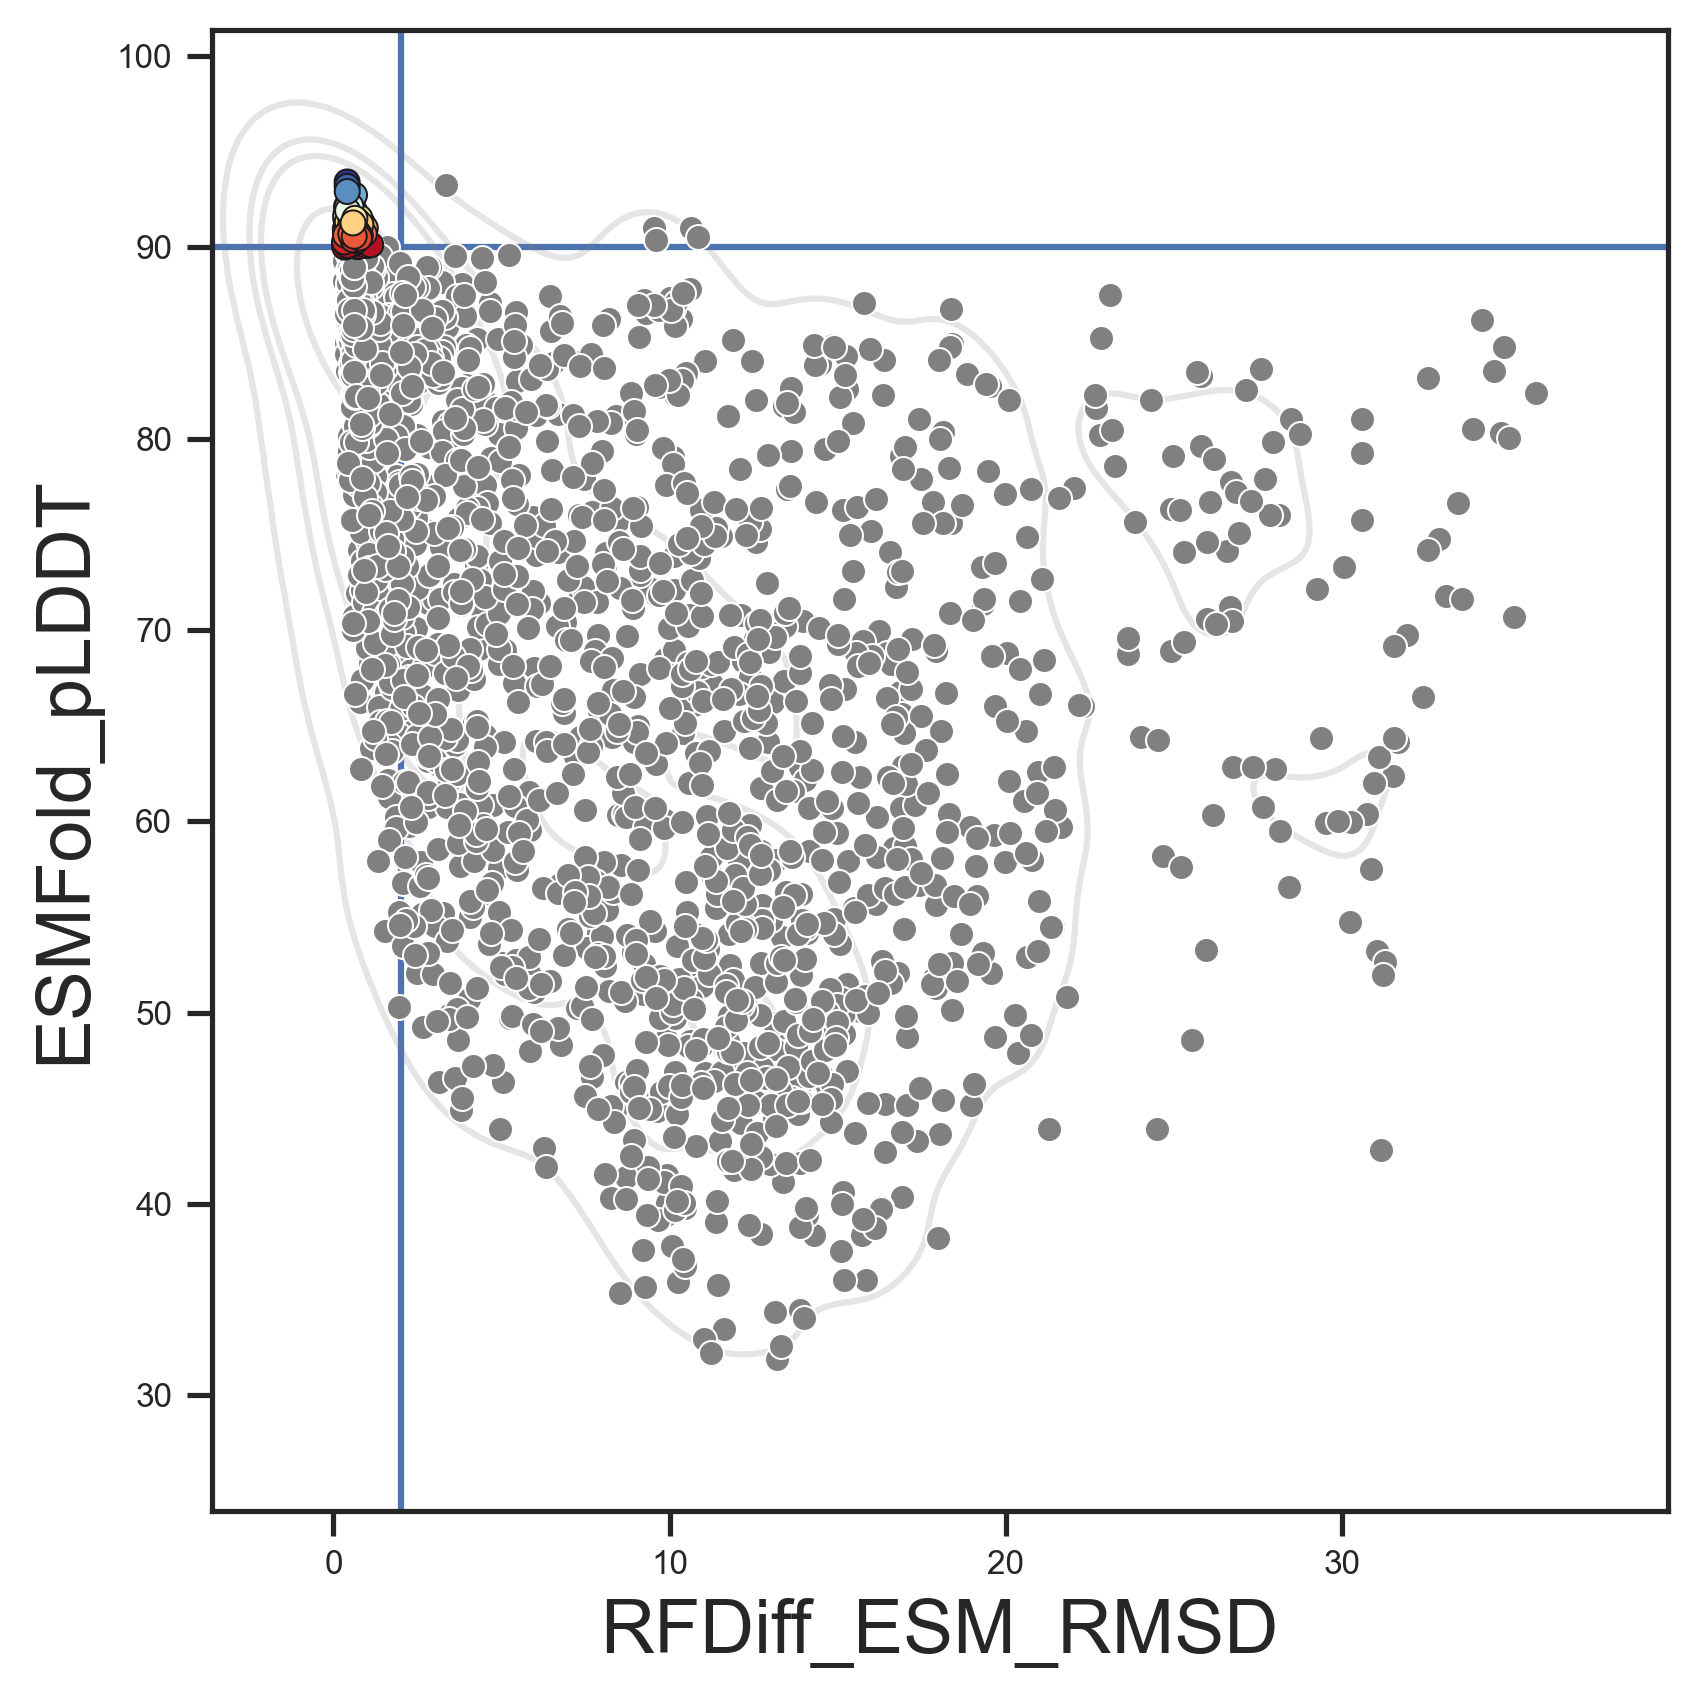

In [49]:
df=master_df.copy()

cut_TM = 2.0
cut_pLDDT = 0.90*100

TM_col_name = 'RFDiff_ESM_RMSD'
pLDDT_col_name = 'ESMFold_pLDDT'
df_TM = df[df[TM_col_name]<cut_TM]
df_pLDDT = df_TM[df_TM[pLDDT_col_name]>cut_pLDDT]
df_best = df_pLDDT[df_pLDDT[TM_col_name]<cut_TM]

fnt= 8
plt.clf()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')
plt.figure(0,(6,6),dpi=300)
hu=pLDDT_col_name

plt.axhline(y=cut_pLDDT,zorder=-2)
plt.axvline(x=cut_TM,zorder=-2)

sns.scatterplot(data=df,x=TM_col_name,y=pLDDT_col_name,color='grey',zorder=0)
sns.scatterplot(data=df_best,x=TM_col_name,y=pLDDT_col_name,hue=hu,palette='RdYlBu',edgecolor='k',zorder=1)

sns.kdeplot(data=df,x=TM_col_name,y=pLDDT_col_name,color='grey',bw_adjust=0.65,levels=5,alpha=0.2,zorder=-1)
#sns.scatterplot(data=df,x='TM-scores',y='pLDDT',sizes='Length')
#sns.lmplot(data=df,x='TM-scores',y='pLDDT',ci='sd')
plt.legend('',frameon=False)
#plt.legend(title=hu,loc=(1.1,0.1))

plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
#plt.ylabel('2BC/(BB+CC) (REU)',fontsize=12)
#plt.xlabel('Generation',fontsize=12)
plt.tight_layout()
print('################\n###Saving data and plot###\n################')
#plt.savefig('output.svg',transparent=True,dpi=2000)


In [50]:
len(df_best)

75

In [52]:
df_best['pmpnn temp'].value_counts()

pmpnn temp
0.10    40
0.01    35
Name: count, dtype: int64

In [53]:
master_df

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path,ESM_pdb_path,RFDiff_binder_pdb_path,ESMFold_pLDDT,RFDiff_ESM_TM_score,RFDiff_ESM_RMSD
1,1,normal_28,EEELKRAEYAANHIWKEAQMGMEYADTYMLGCDIRAQIYPEQQAES...,2.1360,2.1018,0.0375,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/1.fasta,../ESM/03SEP24/set1/outputs/1_result/1.pdb,../RFdiffusion/binders_only/normal_28_0.pdb,75.341865,0.9371,0.861934
2,2,normal_28,YPSFYIALNLSQIFDHSANLSLLYANQKAAGDASRARKPPENAVSA...,2.3515,2.1603,0.0250,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/2.fasta,../ESM/03SEP24/set1/outputs/2_result/2.pdb,../RFdiffusion/binders_only/normal_28_0.pdb,36.034513,0.3698,15.832756
3,3,normal_28,ELKYSEGLADAASQIRAGGNGTAEAMDEAVGAITYAKQAVGLRVHA...,2.3720,2.1852,0.1125,02SEP24/seqs/temp1/normal_28/seqs/normal_28.fa,80,02SEP24/normal_28.pdb,1.00,../ESM/03SEP24/set1/3.fasta,../ESM/03SEP24/set1/outputs/3_result/3.pdb,../RFdiffusion/binders_only/normal_28_0.pdb,50.743154,0.3190,15.356702
4,4,normal_633,LDKNDNSQESACNAAKRNALLADNEAEIQRANGVDKRTVNVMLSTE...,2.3719,2.2206,0.0250,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00,../ESM/03SEP24/set1/4.fasta,../ESM/03SEP24/set1/outputs/4_result/4.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,58.165659,0.5403,24.695251
5,5,normal_633,EEAAKQWLYDNMKTWKEARMKNEYKCTKMLAEGIRPQICEEYLKEG...,2.2969,2.1905,0.0500,02SEP24/seqs/temp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,1.00,../ESM/03SEP24/set1/5.fasta,../ESM/03SEP24/set1/outputs/5_result/5.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,58.698220,0.6717,4.516063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,normal_992,SEEEKKKEEEKKAAEAAKAAKEAALAEGKKDPALYAKVKGAIDAAE...,1.2751,1.7939,0.0375,02SEP24/seqs/tempp01/normal_992/seqs/normal_99...,80,02SEP24/normal_992.pdb,0.01,../ESM/03SEP24/set3/2263.fasta,../ESM/03SEP24/set3/outputs/2263_result/2263.pdb,../RFdiffusion/binders_only/normal_992_0.pdb,76.881743,0.6545,5.355669
2264,2264,beta_377,AAATVTAANIAIATALANAPTWAPDEAIARVTAAAAKLSPKYAEAA...,1.0538,1.7782,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2264.fasta,../ESM/03SEP24/set3/outputs/2264_result/2264.pdb,../RFdiffusion/binders_only/beta_377_0.pdb,70.866109,0.7840,1.813492
2265,2265,beta_377,AEETVTKAELEAAEALAKAPEWSPEETLAKVTAAYAKLSPKRAEEA...,1.0532,1.7615,0.0625,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2265.fasta,../ESM/03SEP24/set3/outputs/2265_result/2265.pdb,../RFdiffusion/binders_only/beta_377_0.pdb,85.912924,0.9659,0.608923
2266,2266,beta_377,AAATTTAAAVAAAAALAAAPTADAAATRAALAAAYATLSPARAAAA...,0.9235,1.6996,0.0500,02SEP24/seqs/tempp01/beta_377/seqs/beta_377.fa,80,02SEP24/beta_377.pdb,0.01,../ESM/03SEP24/set3/2266.fasta,../ESM/03SEP24/set3/outputs/2266_result/2266.pdb,../RFdiffusion/binders_only/beta_377_0.pdb,56.399899,0.5741,4.581711


/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_46763/1729637020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='RFDiff_ESM_RMSD',x='pmpnn temp',palette='colorblind')


<Figure size 640x480 with 0 Axes>

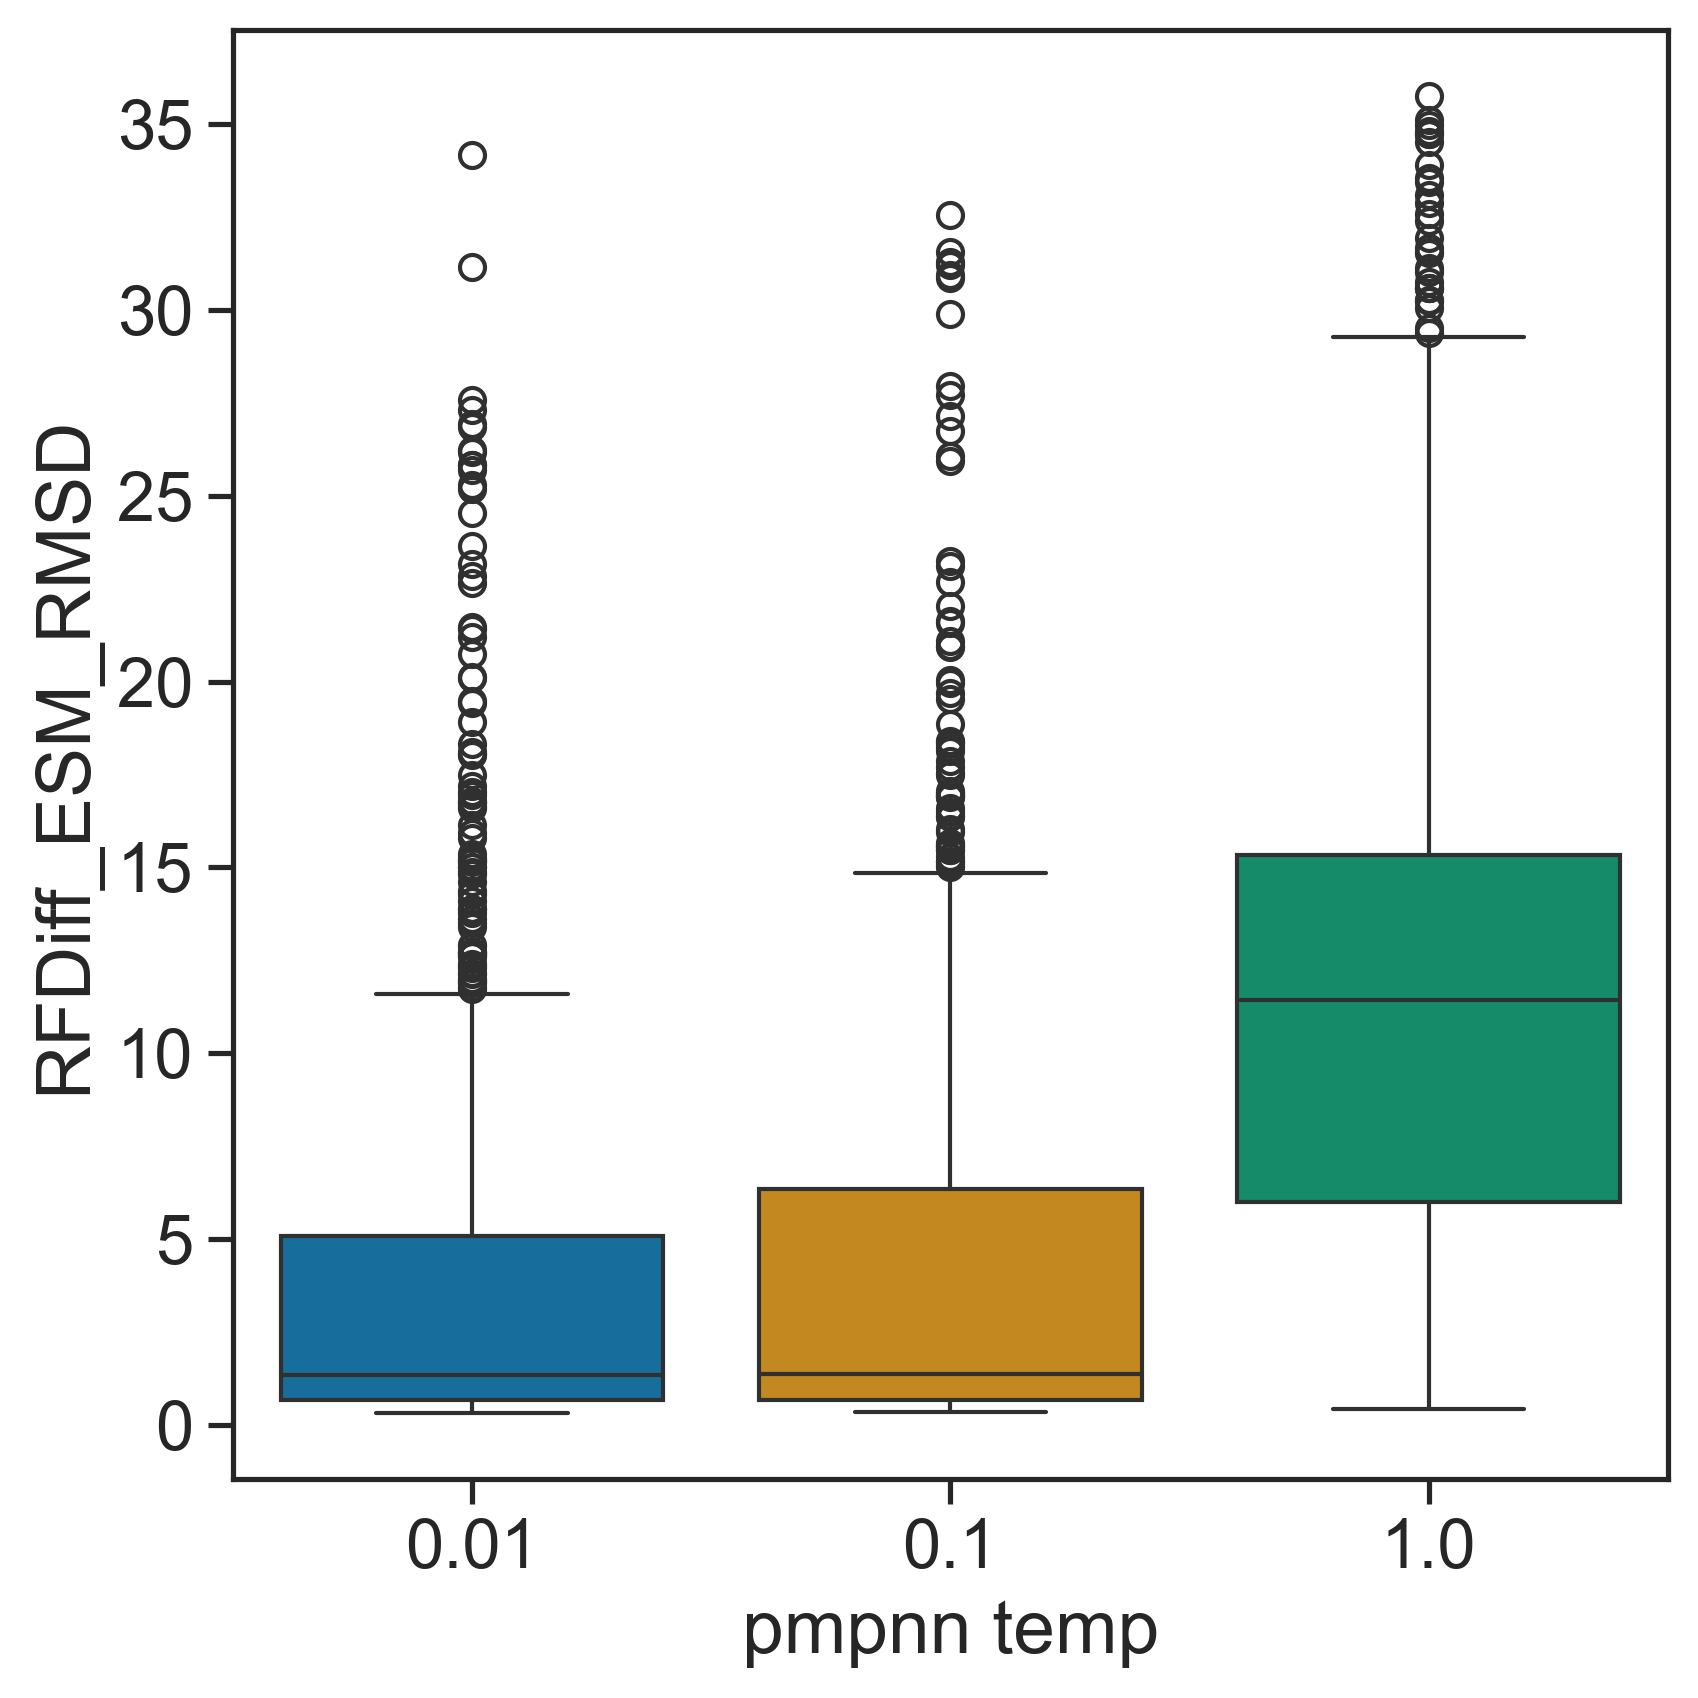

In [54]:

plt.clf()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')
plt.figure(0,(6,6),dpi=300)
df=master_df.copy()
sns.boxplot(data=df,y='RFDiff_ESM_RMSD',x='pmpnn temp',palette='colorblind')
plt.tight_layout()
#plt.savefig('output.svg',transparent=True,dpi=2000)


/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_46763/4160577333.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='RFDiff_ESM_TM_score',x='pmpnn temp',palette='colorblind')


<Figure size 640x480 with 0 Axes>

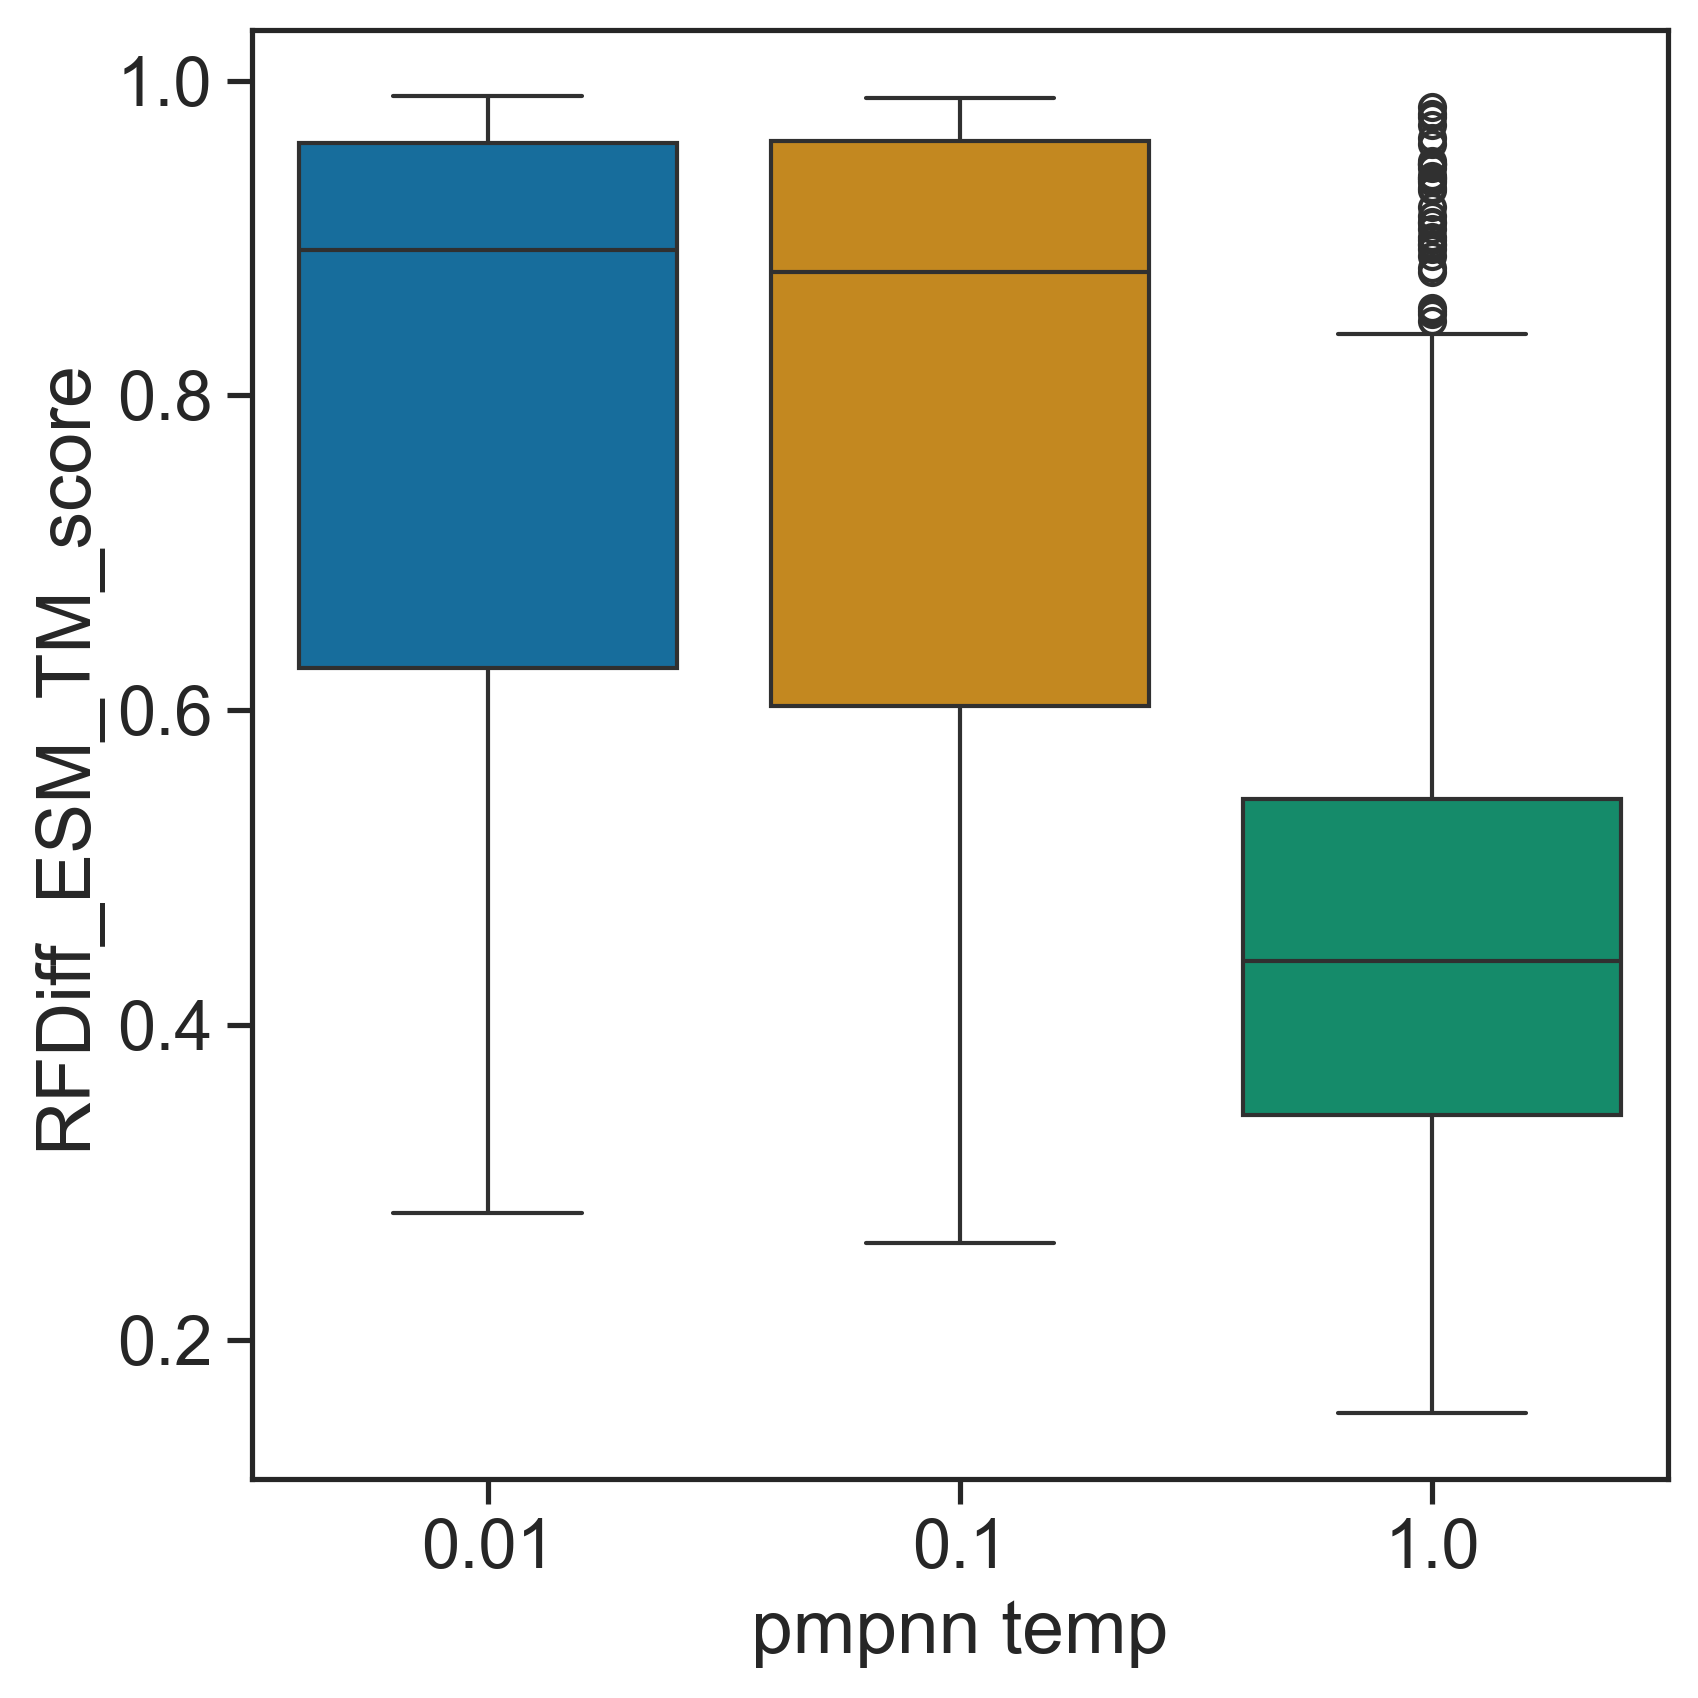

In [55]:

plt.clf()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')
plt.figure(0,(6,6),dpi=300)
df=master_df.copy()
sns.boxplot(data=df,y='RFDiff_ESM_TM_score',x='pmpnn temp',palette='colorblind')
plt.tight_layout()
#plt.savefig('output.svg',transparent=True,dpi=2000)


/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_46763/3753706666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='ESMFold_pLDDT',x='pmpnn temp',palette='colorblind')


<Figure size 640x480 with 0 Axes>

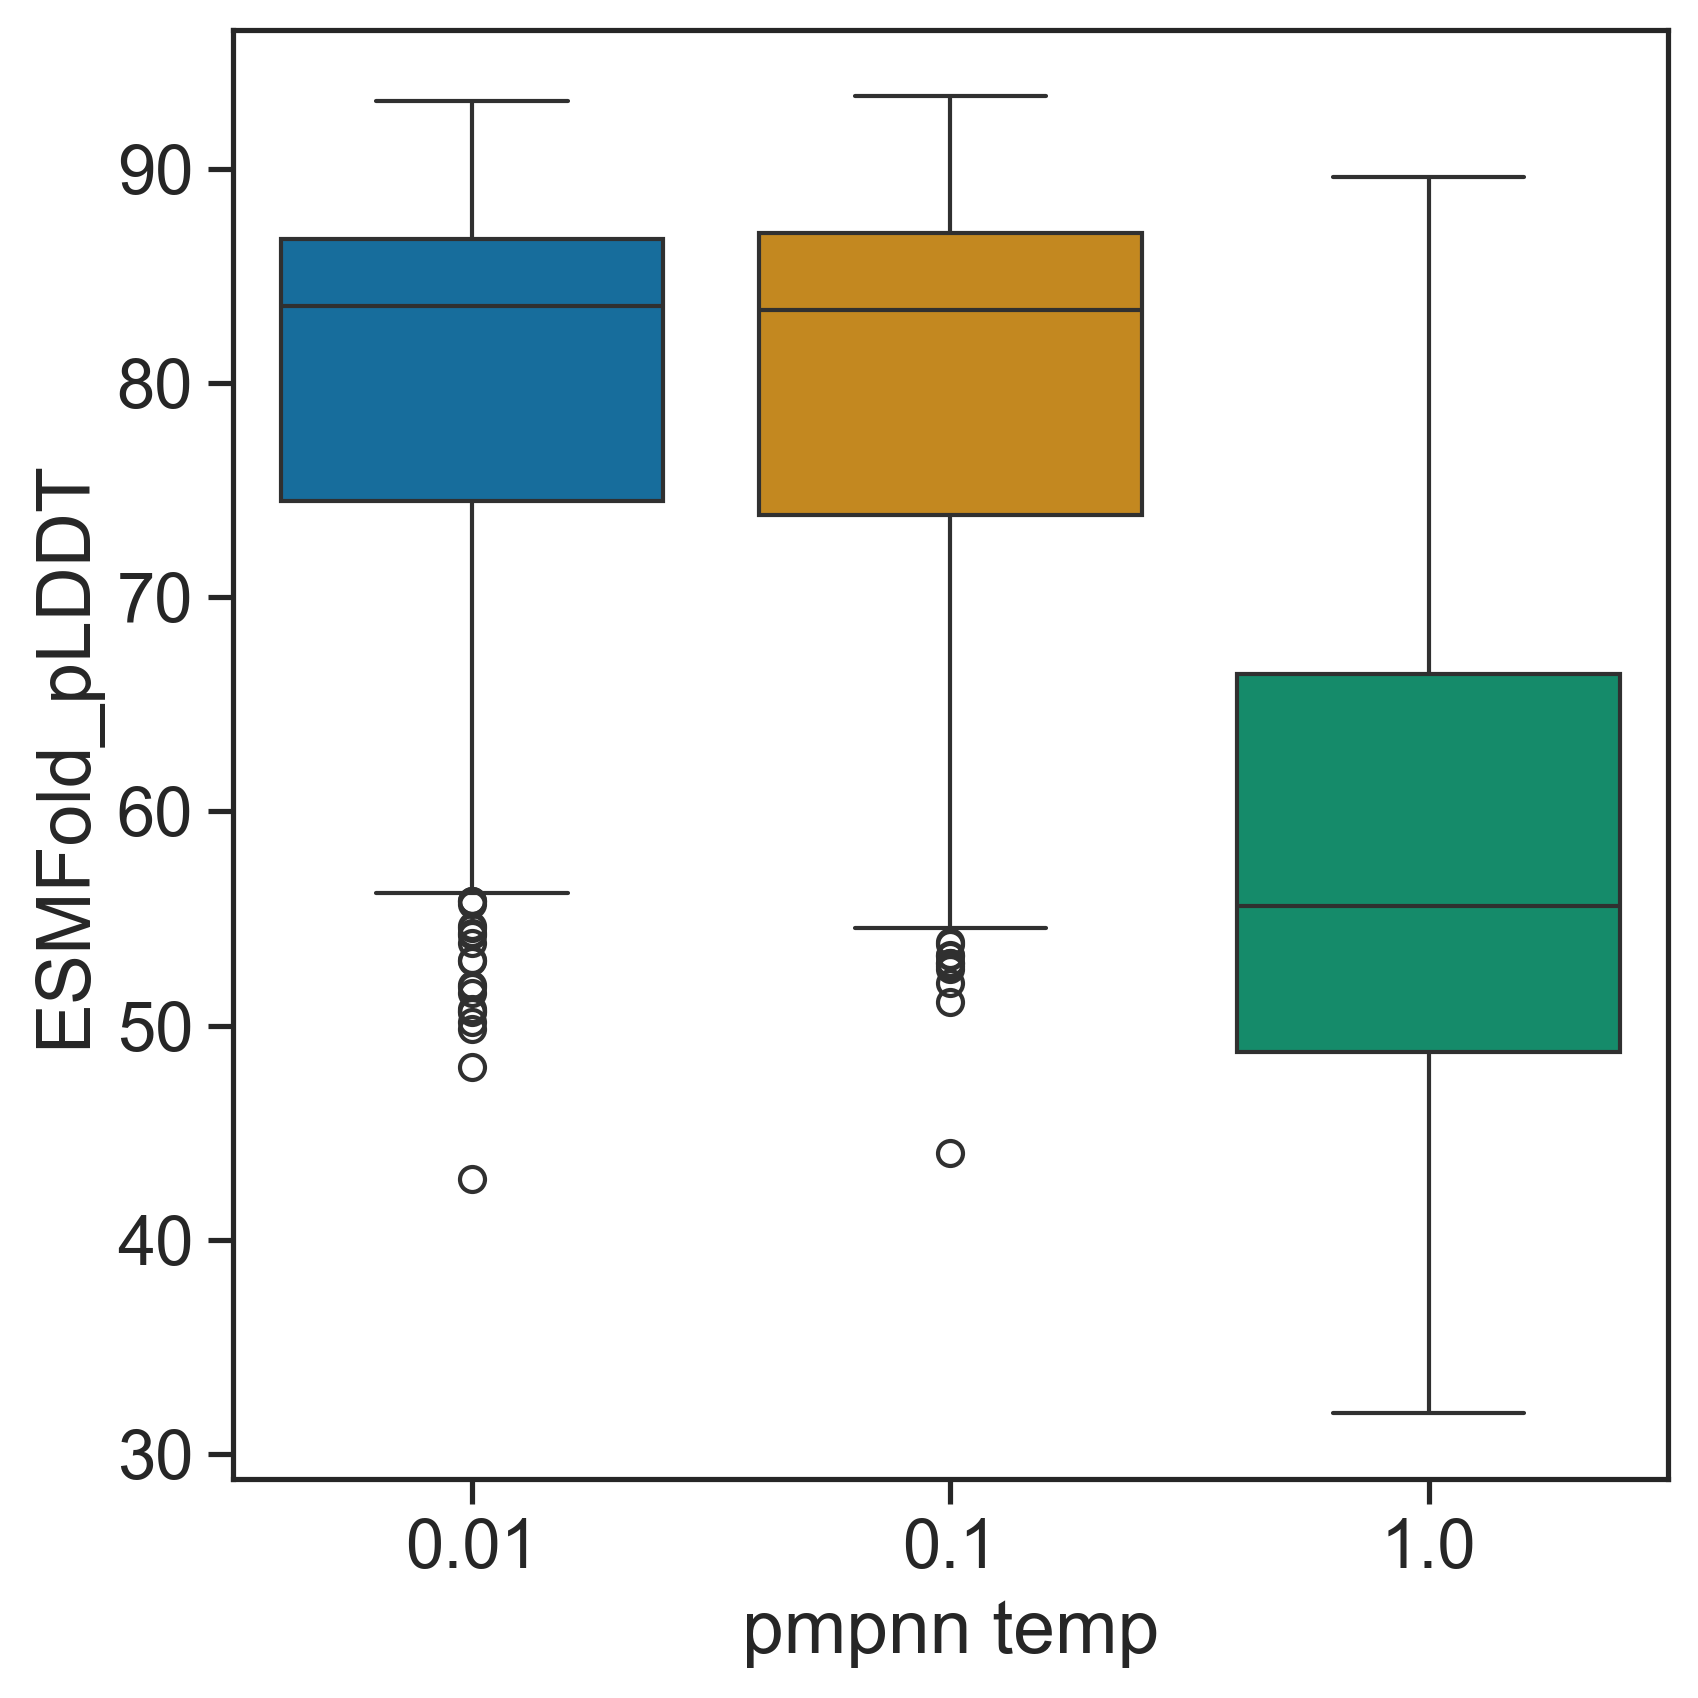

In [56]:

plt.clf()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('ticks')
plt.figure(0,(6,6),dpi=300)
df=master_df.copy()
sns.boxplot(data=df,y='ESMFold_pLDDT',x='pmpnn temp',palette='colorblind')
plt.tight_layout()
#plt.savefig('output.svg',transparent=True,dpi=2000)


In [57]:
df_best

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path,ESM_pdb_path,RFDiff_binder_pdb_path,ESMFold_pLDDT,RFDiff_ESM_TM_score,RFDiff_ESM_RMSD
762,762,normal_633,LAAVEAYLADAAAKAAAAEAAAAAKAAAMAAAGAPKAEVEAYAAAA...,1.0634,1.7062,0.0375,02SEP24/seqs/tempp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,0.10,../ESM/03SEP24/set1/762.fasta,../ESM/03SEP24/set1/outputs/762_result/762.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,90.114253,0.9241,1.027880
774,774,beta_187,DTAARLKTLEEATKTAKELINAAATDAAAKATFDAALDTIAALEPS...,1.0412,1.7715,0.0250,02SEP24/seqs/tempp1/beta_187/seqs/beta_187.fa,80,02SEP24/beta_187.pdb,0.10,../ESM/03SEP24/set1/774.fasta,../ESM/03SEP24/set1/outputs/774_result/774.pdb,../RFdiffusion/binders_only/beta_187_0.pdb,91.269385,0.9728,0.543114
775,775,beta_187,STAEKLAKLKAATDTAAELINKAPTDAEAKAKVDAALDTIAALAPE...,1.0344,1.7701,0.0250,02SEP24/seqs/tempp1/beta_187/seqs/beta_187.fa,80,02SEP24/beta_187.pdb,0.10,../ESM/03SEP24/set1/775.fasta,../ESM/03SEP24/set1/outputs/775_result/775.pdb,../RFdiffusion/binders_only/beta_187_0.pdb,90.677263,0.9877,0.356608
827,827,beta_386,GLAGELKQKAVAAAAREAIAAGPEAVAELADAIGVDTLYGLLAPDP...,0.9609,1.7633,0.0750,02SEP24/seqs/tempp1/beta_386/seqs/beta_386.fa,80,02SEP24/beta_386.pdb,0.10,../ESM/03SEP24/set1/827.fasta,../ESM/03SEP24/set1/outputs/827_result/827.pdb,../RFdiffusion/binders_only/beta_386_0.pdb,91.847903,0.9625,0.639594
878,878,normal_580,DTGALIKAMEEAFGEALAAAKELQKIDPEKGAKVAAEIEAAYAAAK...,0.9691,1.6635,0.0500,02SEP24/seqs/tempp1/normal_580/seqs/normal_580.fa,80,02SEP24/normal_580.pdb,0.10,../ESM/03SEP24/set1/878.fasta,../ESM/03SEP24/set1/outputs/878_result/878.pdb,../RFdiffusion/binders_only/normal_580_0.pdb,91.200055,0.9730,0.543888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,2182,normal_614,SAALEALDAAIAAAEAQKAAATAAAAAYAAAAAAAKAAGDAEAAAK...,0.9920,1.7143,0.0375,02SEP24/seqs/tempp01/normal_614/seqs/normal_61...,80,02SEP24/normal_614.pdb,0.01,../ESM/03SEP24/set3/2182.fasta,../ESM/03SEP24/set3/outputs/2182_result/2182.pdb,../RFdiffusion/binders_only/normal_614_0.pdb,92.904692,0.9840,0.410402
2219,2219,beta_980,STAANLAAIKANQAIVAGNPVAKAAMDALLELAQADPSLAEEALTA...,0.9652,1.7427,0.0375,02SEP24/seqs/tempp01/beta_980/seqs/beta_980.fa,80,02SEP24/beta_980.pdb,0.01,../ESM/03SEP24/set3/2219.fasta,../ESM/03SEP24/set3/outputs/2219_result/2219.pdb,../RFdiffusion/binders_only/beta_980_0.pdb,90.688608,0.9753,0.514952
2237,2237,beta_51,AAAQAAKAAAQAALKEVKEKGLNAEEAQKLLGALQEQLKKAGWLNG...,0.9512,1.7137,0.0625,02SEP24/seqs/tempp01/beta_51/seqs/beta_51.fa,80,02SEP24/beta_51.pdb,0.01,../ESM/03SEP24/set3/2237.fasta,../ESM/03SEP24/set3/outputs/2237_result/2237.pdb,../RFdiffusion/binders_only/beta_51_0.pdb,90.566773,0.9648,0.617189
2248,2248,beta_1,AAATRDAYVAAVVAAAVAGDKAGMAAAVAAAAAALGSAADLAAAQA...,0.9144,1.7319,0.0625,02SEP24/seqs/tempp01/beta_1/seqs/beta_1.fa,80,02SEP24/beta_1.pdb,0.01,../ESM/03SEP24/set3/2248.fasta,../ESM/03SEP24/set3/outputs/2248_result/2248.pdb,../RFdiffusion/binders_only/beta_1_0.pdb,91.505040,0.9637,0.637108


In [59]:
df_best = df_best.iloc[:,1:]

,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path,ESM_pdb_path,RFDiff_binder_pdb_path,ESMFold_pLDDT,RFDiff_ESM_TM_score,RFDiff_ESM_RMSD
2110,beta_763,DKLDELAAKAMELAAENPELAAILAGKIGSLRTCVETGGTPEEAKA...,0.9371,1.7160,0.0875,02SEP24/seqs/tempp01/beta_763/seqs/beta_763.fa,80,02SEP24/beta_763.pdb,0.01,../ESM/03SEP24/set3/2110.fasta,../ESM/03SEP24/set3/outputs/2110_result/2110.pdb,../RFdiffusion/binders_only/beta_763_0.pdb,90.274177,0.9896,0.328511
1989,beta_688,AAAEKAAALAKEITDYAKKAADALLAGKEKEAAEYLAKANAAYNTG...,1.0455,1.7835,0.0375,02SEP24/seqs/tempp01/beta_688/seqs/beta_688.fa,80,02SEP24/beta_688.pdb,0.01,../ESM/03SEP24/set2/1989.fasta,../ESM/03SEP24/set2/outputs/1989_result/1989.pdb,../RFdiffusion/binders_only/beta_688_0.pdb,90.002071,0.9892,0.335345
1232,beta_688,AQAAKTAAAAAAITAATAAAAAAIAAGDLAAAAAARAAANATYGEG...,1.0196,1.7838,0.0625,02SEP24/seqs/tempp1/beta_688/seqs/beta_688.fa,80,02SEP24/beta_688.pdb,0.10,../ESM/03SEP24/set2/1232.fasta,../ESM/03SEP24/set2/outputs/1232_result/1232.pdb,../RFdiffusion/binders_only/beta_688_0.pdb,90.107899,0.9892,0.335946
1233,beta_688,ADAAKAAAAAAAITDYANKAAAALLAGNEAEAAAYLAKANAVYNTG...,1.0258,1.7761,0.0375,02SEP24/seqs/tempp1/beta_688/seqs/beta_688.fa,80,02SEP24/beta_688.pdb,0.10,../ESM/03SEP24/set2/1233.fasta,../ESM/03SEP24/set2/outputs/1233_result/1233.pdb,../RFdiffusion/binders_only/beta_688_0.pdb,90.943764,0.9881,0.351905
775,beta_187,STAEKLAKLKAATDTAAELINKAPTDAEAKAKVDAALDTIAALAPE...,1.0344,1.7701,0.0250,02SEP24/seqs/tempp1/beta_187/seqs/beta_187.fa,80,02SEP24/beta_187.pdb,0.10,../ESM/03SEP24/set1/775.fasta,../ESM/03SEP24/set1/outputs/775_result/775.pdb,../RFdiffusion/binders_only/beta_187_0.pdb,90.677263,0.9877,0.356608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,beta_906,EEKFDELLKKAKEGAAQAPIDGTKAFTDEACAKVTPADCTTLKALA...,1.0654,1.7738,0.0375,02SEP24/seqs/tempp01/beta_906/seqs/beta_906.fa,80,02SEP24/beta_906.pdb,0.01,../ESM/03SEP24/set2/1769.fasta,../ESM/03SEP24/set2/outputs/1769_result/1769.pdb,../RFdiffusion/binders_only/beta_906_0.pdb,90.694190,0.9298,0.917060
1691,beta_8,ADSAAVQRDKTAAAGFTTIATSDDAAARAAAAATIAATCNQGDADG...,0.9648,1.7501,0.0500,02SEP24/seqs/tempp01/beta_8/seqs/beta_8.fa,80,02SEP24/beta_8.pdb,0.01,../ESM/03SEP24/set2/1691.fasta,../ESM/03SEP24/set2/outputs/1691_result/1691.pdb,../RFdiffusion/binders_only/beta_8_0.pdb,90.998645,0.9270,0.947304
1518,normal_633,LAAVEAYLADAQAKAAAAAAAADAKAAAMAAAGAPKAEVEAYKAAA...,1.0441,1.6989,0.0375,02SEP24/seqs/tempp01/normal_633/seqs/normal_63...,80,02SEP24/normal_633.pdb,0.01,../ESM/03SEP24/set2/1518.fasta,../ESM/03SEP24/set2/outputs/1518_result/1518.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,90.079364,0.9281,0.984525
762,normal_633,LAAVEAYLADAAAKAAAAEAAAAAKAAAMAAAGAPKAEVEAYAAAA...,1.0634,1.7062,0.0375,02SEP24/seqs/tempp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,0.10,../ESM/03SEP24/set1/762.fasta,../ESM/03SEP24/set1/outputs/762_result/762.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,90.114253,0.9241,1.027880


In [61]:
df_best = df_best.sort_values('RFDiff_ESM_RMSD')

In [62]:
df_best = df_best.reset_index(drop=True)
df_best = df_best.reset_index(drop=False)

In [63]:
df_best

,index,pdb_file,sequence,score,global_score,seq_recovery,fasta_file_path,sequence_length,RDiff_pdb_file_path,pmpnn temp,fasta_path,ESM_pdb_path,RFDiff_binder_pdb_path,ESMFold_pLDDT,RFDiff_ESM_TM_score,RFDiff_ESM_RMSD
0,0,beta_763,DKLDELAAKAMELAAENPELAAILAGKIGSLRTCVETGGTPEEAKA...,0.9371,1.7160,0.0875,02SEP24/seqs/tempp01/beta_763/seqs/beta_763.fa,80,02SEP24/beta_763.pdb,0.01,../ESM/03SEP24/set3/2110.fasta,../ESM/03SEP24/set3/outputs/2110_result/2110.pdb,../RFdiffusion/binders_only/beta_763_0.pdb,90.274177,0.9896,0.328511
1,1,beta_688,AAAEKAAALAKEITDYAKKAADALLAGKEKEAAEYLAKANAAYNTG...,1.0455,1.7835,0.0375,02SEP24/seqs/tempp01/beta_688/seqs/beta_688.fa,80,02SEP24/beta_688.pdb,0.01,../ESM/03SEP24/set2/1989.fasta,../ESM/03SEP24/set2/outputs/1989_result/1989.pdb,../RFdiffusion/binders_only/beta_688_0.pdb,90.002071,0.9892,0.335345
2,2,beta_688,AQAAKTAAAAAAITAATAAAAAAIAAGDLAAAAAARAAANATYGEG...,1.0196,1.7838,0.0625,02SEP24/seqs/tempp1/beta_688/seqs/beta_688.fa,80,02SEP24/beta_688.pdb,0.10,../ESM/03SEP24/set2/1232.fasta,../ESM/03SEP24/set2/outputs/1232_result/1232.pdb,../RFdiffusion/binders_only/beta_688_0.pdb,90.107899,0.9892,0.335946
3,3,beta_688,ADAAKAAAAAAAITDYANKAAAALLAGNEAEAAAYLAKANAVYNTG...,1.0258,1.7761,0.0375,02SEP24/seqs/tempp1/beta_688/seqs/beta_688.fa,80,02SEP24/beta_688.pdb,0.10,../ESM/03SEP24/set2/1233.fasta,../ESM/03SEP24/set2/outputs/1233_result/1233.pdb,../RFdiffusion/binders_only/beta_688_0.pdb,90.943764,0.9881,0.351905
4,4,beta_187,STAEKLAKLKAATDTAAELINKAPTDAEAKAKVDAALDTIAALAPE...,1.0344,1.7701,0.0250,02SEP24/seqs/tempp1/beta_187/seqs/beta_187.fa,80,02SEP24/beta_187.pdb,0.10,../ESM/03SEP24/set1/775.fasta,../ESM/03SEP24/set1/outputs/775_result/775.pdb,../RFdiffusion/binders_only/beta_187_0.pdb,90.677263,0.9877,0.356608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,beta_906,EEKFDELLKKAKEGAAQAPIDGTKAFTDEACAKVTPADCTTLKALA...,1.0654,1.7738,0.0375,02SEP24/seqs/tempp01/beta_906/seqs/beta_906.fa,80,02SEP24/beta_906.pdb,0.01,../ESM/03SEP24/set2/1769.fasta,../ESM/03SEP24/set2/outputs/1769_result/1769.pdb,../RFdiffusion/binders_only/beta_906_0.pdb,90.694190,0.9298,0.917060
71,71,beta_8,ADSAAVQRDKTAAAGFTTIATSDDAAARAAAAATIAATCNQGDADG...,0.9648,1.7501,0.0500,02SEP24/seqs/tempp01/beta_8/seqs/beta_8.fa,80,02SEP24/beta_8.pdb,0.01,../ESM/03SEP24/set2/1691.fasta,../ESM/03SEP24/set2/outputs/1691_result/1691.pdb,../RFdiffusion/binders_only/beta_8_0.pdb,90.998645,0.9270,0.947304
72,72,normal_633,LAAVEAYLADAQAKAAAAAAAADAKAAAMAAAGAPKAEVEAYKAAA...,1.0441,1.6989,0.0375,02SEP24/seqs/tempp01/normal_633/seqs/normal_63...,80,02SEP24/normal_633.pdb,0.01,../ESM/03SEP24/set2/1518.fasta,../ESM/03SEP24/set2/outputs/1518_result/1518.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,90.079364,0.9281,0.984525
73,73,normal_633,LAAVEAYLADAAAKAAAAEAAAAAKAAAMAAAGAPKAEVEAYAAAA...,1.0634,1.7062,0.0375,02SEP24/seqs/tempp1/normal_633/seqs/normal_633.fa,80,02SEP24/normal_633.pdb,0.10,../ESM/03SEP24/set1/762.fasta,../ESM/03SEP24/set1/outputs/762_result/762.pdb,../RFdiffusion/binders_only/normal_633_0.pdb,90.114253,0.9241,1.027880


In [64]:
def write_fasta_files_AFpulldown(df):
    
    # Iterate over rows of the dataframe
    for index, row in df.iterrows():
        # Generate the filename for the FASTA file using the pdb_file column
        file_name = f"AF_pulldown.fasta"
        file_name_txt = f"AF_pulldown.txt"
        
        # Write the sequence to the FASTA file
        with open(file_name, "a") as fasta_file:
            fasta_file.write(f">{index}\n")
            fasta_file.write(f"{row['sequence']}\n")
            
        # Write the sequence to the FASTA file
        with open(file_name_txt, "a") as fasta_file:
            fasta_file.write(f"{index}\n")
            
write_fasta_files_AFpulldown(df_best)


## Go run AlphaPulldown

Evaluate using:
```
module load miniconda3/23.5.2
module load singularity/3.8.7
singularity exec \
    --no-home \
    --bind ./step2-models/:/mnt \
    /projects/cpr_sbmm/people/phr361/AntiAntiPhage/Zorya/AntiEcZorIC/AF_pulldown/alpha-analysis_jax_0.4.sif \
    run_get_good_pae.sh \
    --output_dir=/mnt \
    --cutoff=7
```

In [66]:
df_AFpulldown_results = pd.read_csv('../AlphaPulldown/predictions_with_good_interpae.csv')

In [67]:
df_AFpulldown_results

,jobs,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,sb,int_solv_en,int_area,pi_score,iptm_ptm,iptm,mpDockQ/pDockQ
0,wt_and_27,C_B,21,0.286,0.381,0.238,25,0.364,9,4,-5.26,974.93,-1.42,0.675757,0.692046,0.202024
1,wt_and_51,C_B,17,0.353,0.353,0.235,20,0.315,7,0,-0.46,595.06,-1.95,0.654863,0.668431,0.059580
2,wt_and_67,C_B,22,0.318,0.455,0.136,16,0.295,7,1,-6.10,690.03,-1.49,0.491046,0.476240,0.121452
